In [38]:
import pandas as pd
df = pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [39]:
cols_to_drop = [col for col in ["New", "PendingS"] if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
df = df.dropna(subset=['Amount'])
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)
df['qty'] = df['qty'].astype(int)
df['amount'] = df['amount'].astype(float)
df.reset_index(drop=True, inplace=True)
df.info()
df.head()

/tmp/ipython-input-39-2332223911.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna('Unknown', inplace=True)
/tmp/ipython-input-39-2332223911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ship-city'].fillna('Unknown', inplace=True)
/tmp/ipython-input-39-2332223911.py:6: FutureWarning: A value is trying to be s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121019 entries, 0 to 121018
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121019 non-null  int64         
 1   order_id            121019 non-null  object        
 2   date                69259 non-null   datetime64[ns]
 3   status              121019 non-null  object        
 4   fulfilment          121019 non-null  object        
 5   sales_channel       121019 non-null  object        
 6   ship-service-level  121019 non-null  object        
 7   category            121019 non-null  object        
 8   size                121019 non-null  object        
 9   courier_status      121019 non-null  object        
 10  qty                 121019 non-null  int64         
 11  currency            121019 non-null  object        
 12  amount              121019 non-null  float64       
 13  ship-city           121019 no

,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [40]:
from google.colab import files

df.to_csv("Cleaned_Amazon_Sale_Report.csv", index=False)
files.download("Cleaned_Amazon_Sale_Report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
total_revenue = df['amount'].sum()
total_qty = df['qty'].sum()
total_orders = df['order_id'].nunique()

print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Quantity Sold: {total_qty}")
print(f"Total Orders: {total_orders}")

Total Revenue: ₹78,496,786.39
Total Quantity Sold: 116329
Total Orders: 112887


In [42]:
df['month'] = df['date'].dt.to_period('M')

monthly_sales = df.groupby('month').agg({
    'amount': 'sum',
    'order_id': 'nunique',
    'qty': 'sum'
}).reset_index()

monthly_sales['month'] = monthly_sales['month'].astype(str)
monthly_sales.head()

,month,amount,order_id,qty
0,2022-03,101683.85,150,156
1,2022-04,17420303.65,26205,26767
2,2022-05,14987650.07,20695,21226
3,2022-06,12510618.36,17529,18177


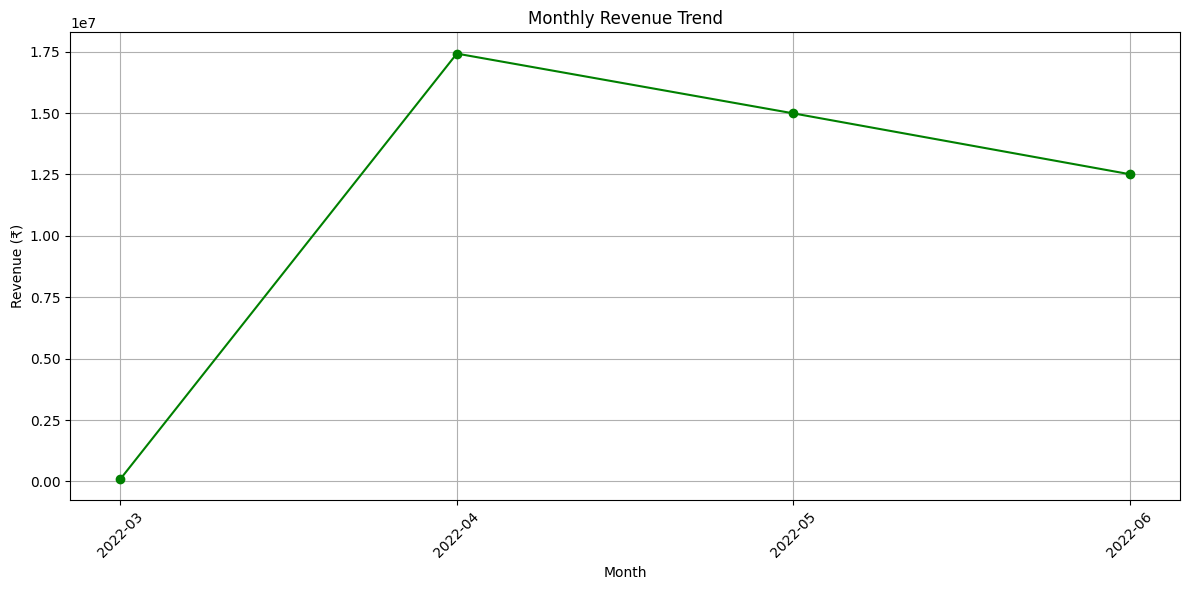

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['amount'], marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

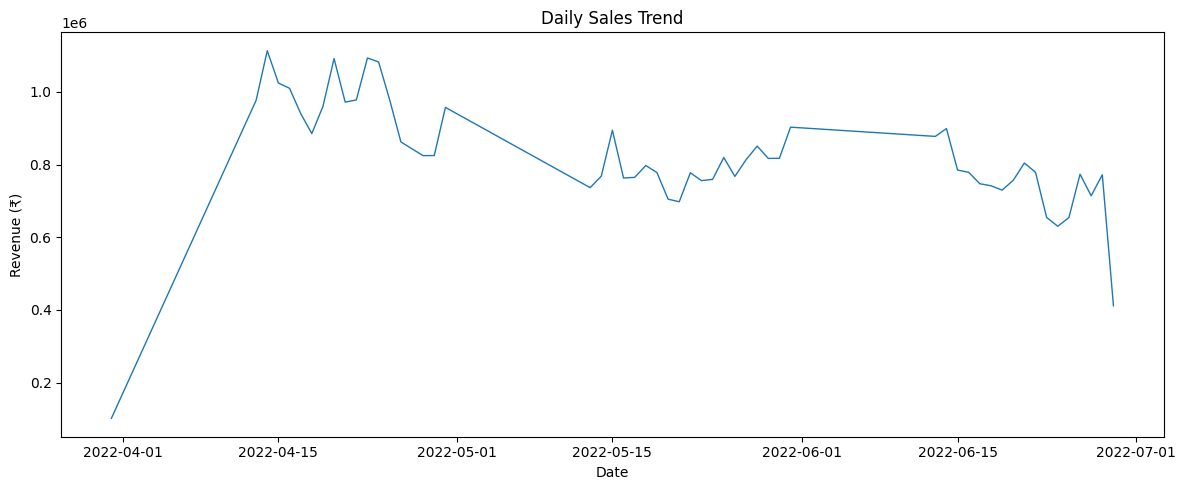

In [44]:
daily_sales = df.groupby('date').agg({
    'amount': 'sum',
    'order_id': 'nunique'
}).reset_index()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_sales['date'], daily_sales['amount'], linewidth=1)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

In [45]:
aov = total_revenue / total_orders
print(f"Average Order Value (AOV): ₹{aov:.2f}")

Average Order Value (AOV): ₹695.36


In [46]:
top_days = daily_sales.sort_values(by='amount', ascending=False).head(5)
print(top_days)

         date      amount  order_id
2  2022-04-14  1113487.56      1653
11 2022-04-23  1093536.62      1614
8  2022-04-20  1091926.41      1616
12 2022-04-24  1082483.95      1591
3  2022-04-15  1024542.13      1591


In [47]:
top_categories = df.groupby('category')['amount'].sum().sort_values(ascending=False).reset_index()
top_categories.head(10)

,category,amount
0,T-shirt,39154132.17
1,Shirt,21269768.70
2,Blazzer,11208506.12
3,Trousers,5341305.30
4,Perfume,789419.66
5,Wallet,458408.18
6,Socks,150397.50
7,Shoes,123933.76
8,Watch,915.00


In [48]:
top_categories_qty = df.groupby('category')['qty'].sum().sort_values(ascending=False).reset_index()
top_categories_qty.head(10)

,category,qty
0,T-shirt,45164
1,Shirt,44903
2,Blazzer,13930
3,Trousers,9885
4,Perfume,1051
5,Wallet,844
6,Socks,397
7,Shoes,152
8,Watch,3


/tmp/ipython-input-49-4280804243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories.head(10), x='amount', y='category', palette='viridis')


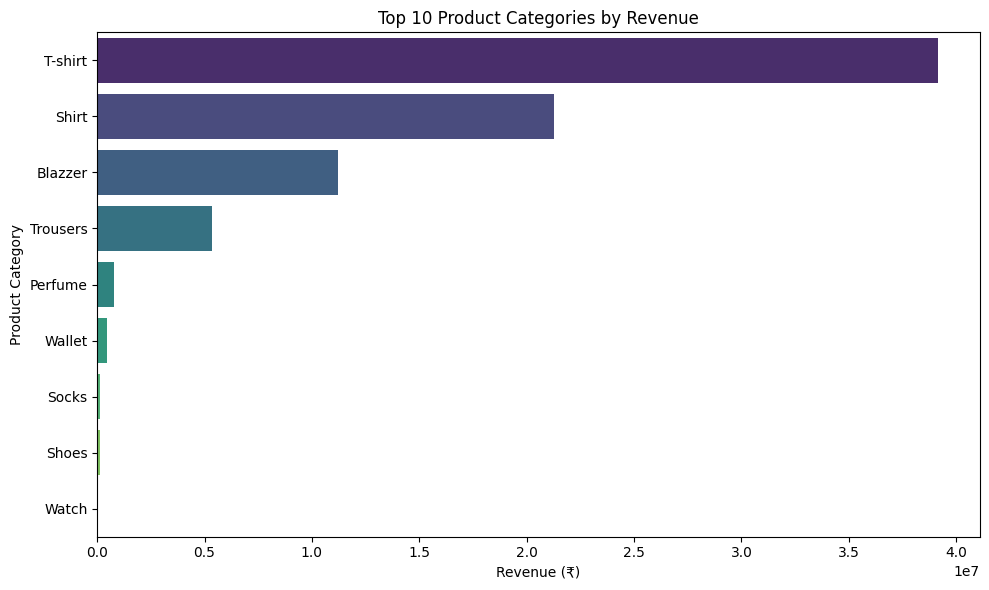

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_categories.head(10), x='amount', y='category', palette='viridis')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

In [50]:
size_pref = df.groupby('size')['qty'].sum().sort_values(ascending=False).reset_index()
size_pref.head()

,size,qty
0,M,20096
1,L,19652
2,XL,18587
3,XXL,16200
4,S,15004


/tmp/ipython-input-51-1625304837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_pref.head(10), x='qty', y='size', palette='mako')


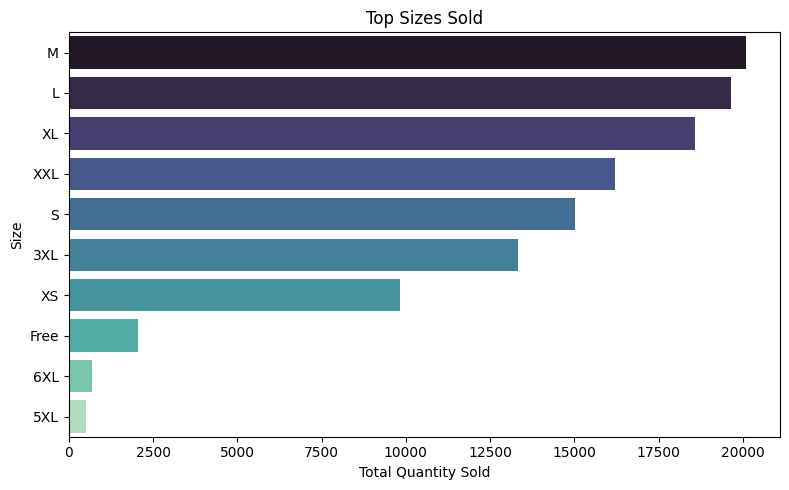

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(data=size_pref.head(10), x='qty', y='size', palette='mako')
plt.title("Top Sizes Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Size")
plt.tight_layout()
plt.show()

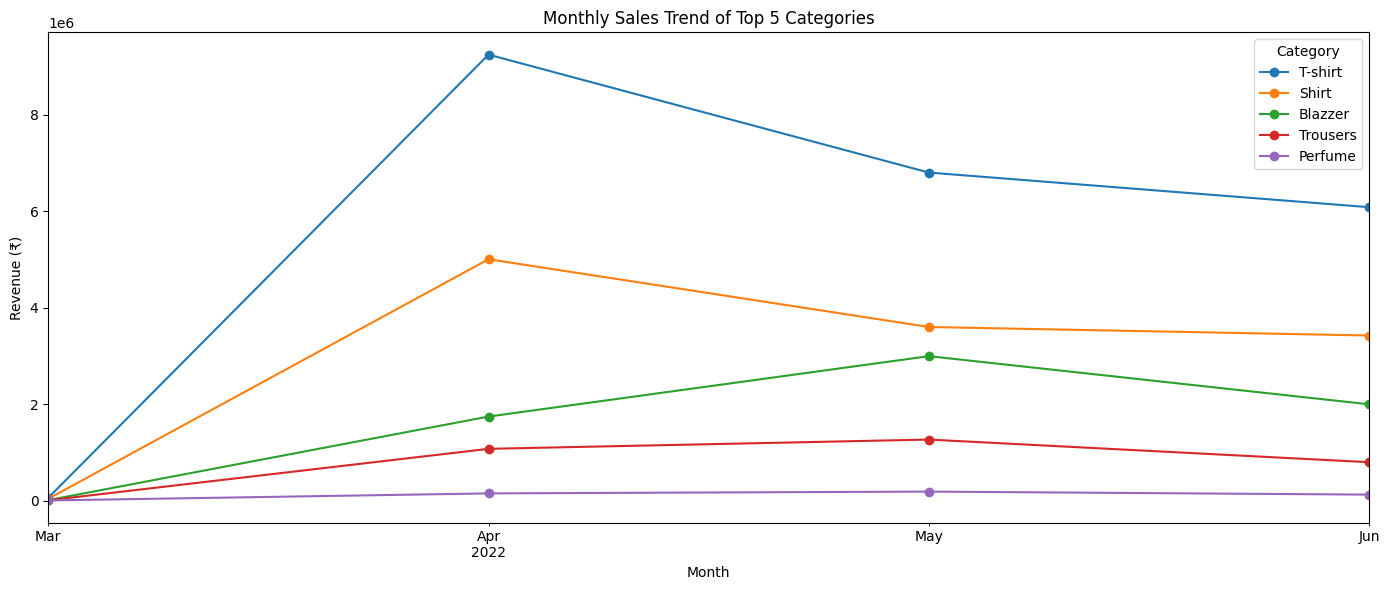

In [52]:
category_monthly = df.groupby([df['date'].dt.to_period('M'), 'category'])['amount'].sum().unstack().fillna(0)
top5_categories = top_categories['category'].head(5)
category_monthly[top5_categories].plot(figsize=(14,6), marker='o')
plt.title("Monthly Sales Trend of Top 5 Categories")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [53]:
df['fulfilment'].value_counts()

,count
fulfilment,
Amazon,83542
Merchant,37477


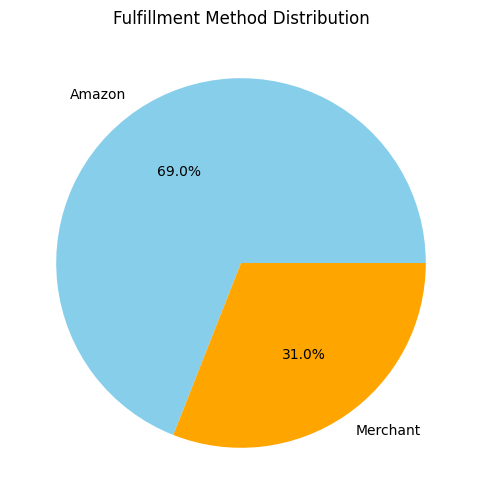

In [54]:
import matplotlib.pyplot as plt

df['fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['skyblue', 'orange'])
plt.title("Fulfillment Method Distribution")
plt.ylabel('')
plt.show()

In [55]:
revenue_by_fulfillment = df.groupby('fulfilment')['amount'].sum().sort_values(ascending=False).reset_index()
revenue_by_fulfillment

,fulfilment,amount
0,Amazon,54262165.00
1,Merchant,24234621.39


/tmp/ipython-input-56-2532560352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_fulfillment, x='fulfilment', y='amount', palette='pastel')


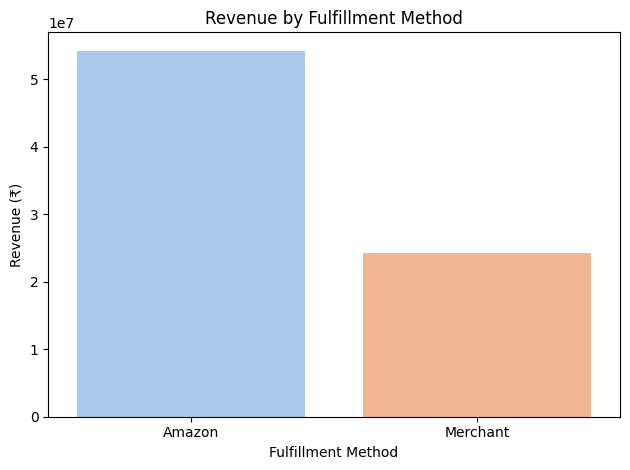

In [56]:
import seaborn as sns

sns.barplot(data=revenue_by_fulfillment, x='fulfilment', y='amount', palette='pastel')
plt.title("Revenue by Fulfillment Method")
plt.xlabel("Fulfillment Method")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()

In [57]:
orders_by_fulfillment = df.groupby('fulfilment')['order_id'].nunique().reset_index().sort_values(by='order_id', ascending=False)
orders_by_fulfillment.rename(columns={'order_id': 'total_orders'}, inplace=True)
orders_by_fulfillment

,fulfilment,total_orders
0,Amazon,78211
1,Merchant,34676


In [58]:
qty_by_fulfillment = df.groupby('fulfilment')['qty'].sum().sort_values(ascending=False).reset_index()
qty_by_fulfillment

,fulfilment,qty
0,Amazon,83823
1,Merchant,32506


In [59]:
aov_by_fulfillment = df.groupby('fulfilment').agg({
    'amount': 'sum',
    'order_id': 'nunique'
}).reset_index()

aov_by_fulfillment['AOV'] = aov_by_fulfillment['amount'] / aov_by_fulfillment['order_id']
aov_by_fulfillment[['fulfilment', 'AOV']]

,fulfilment,AOV
0,Amazon,693.791986
1,Merchant,698.887455


In [60]:
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b', 'fulfilled-by', 'month'],
      dtype='object')

In [61]:
top_cities = df.groupby('ship-city')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
top_states = df.groupby('ship-state')['amount'].sum().sort_values(ascending=False).head(10).reset_index()

/tmp/ipython-input-62-3734492503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, y='ship-state', x='amount', palette='Blues_d')


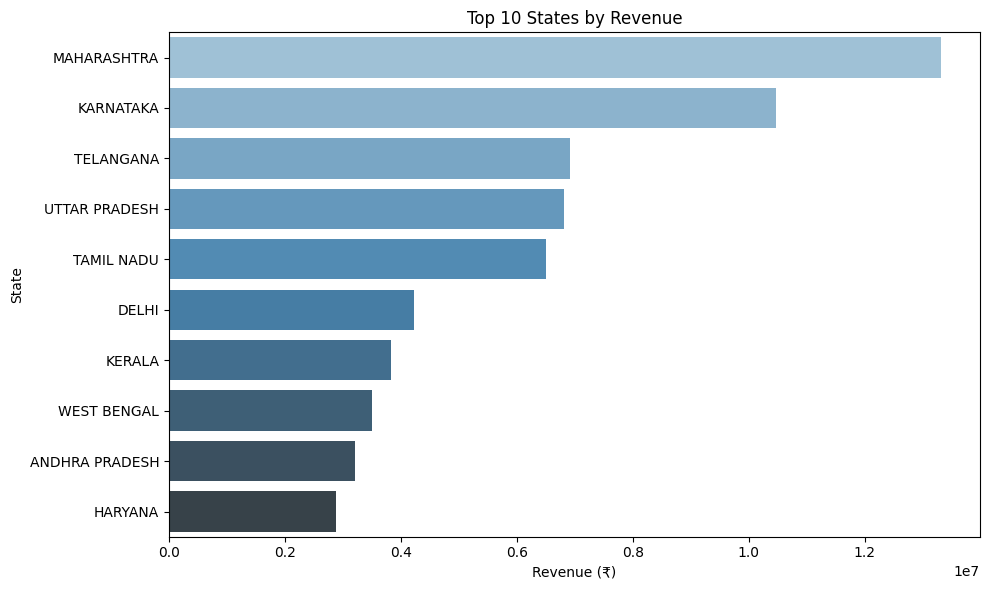

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_states, y='ship-state', x='amount', palette='Blues_d')
plt.title("Top 10 States by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [63]:
df['date'] = pd.to_datetime(df['date'])
snapshot_date = df['date'].max()
rfm = df.groupby('ship-city').agg({
    'date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'amount': 'sum'
}).reset_index()
rfm.columns = ['customer_city', 'recency', 'frequency', 'monetary']
rfm.head()

,customer_city,recency,frequency,monetary
0,(Chikmagalur disterict). (N.R pur thaluku),NaN,1,389.0
1,"(Via Cuncolim)Quepem,South Goa",2.0,1,1163.0
2,",HYDERABAD",68.0,1,563.0
3,",raibarely road faizabad (Ayodhya)",NaN,1,1122.0
4,..katra,NaN,1,641.0


In [64]:
rfm['segment'] = pd.qcut(rfm['monetary'], q=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
rfm.head()

,customer_city,recency,frequency,monetary,segment
0,(Chikmagalur disterict). (N.R pur thaluku),NaN,1,389.0,Bronze
1,"(Via Cuncolim)Quepem,South Goa",2.0,1,1163.0,Gold
2,",HYDERABAD",68.0,1,563.0,Bronze
3,",raibarely road faizabad (Ayodhya)",NaN,1,1122.0,Gold
4,..katra,NaN,1,641.0,Silver


In [65]:
top_customers = rfm.sort_values(by='monetary', ascending=False).head(10)
top_customers

,customer_city,recency,frequency,monetary,segment
750,BENGALURU,0.0,9934,6836614.65,Platinum
2813,HYDERABAD,0.0,6967,4941790.25,Platinum
4653,MUMBAI,0.0,5416,3696704.04,Platinum
5230,NEW DELHI,0.0,5102,3608277.78,Platinum
1416,CHENNAI,0.0,4667,3098745.74,Platinum
5982,PUNE,0.0,3403,2337978.18,Platinum
3602,KOLKATA,0.0,2116,1412815.87,Platinum
2532,GURUGRAM,0.0,1690,1220562.74,Platinum
7370,THANE,0.0,1522,1003878.29,Platinum
4268,LUCKNOW,0.0,1291,933926.34,Platinum


In [66]:
repeat_buyers = rfm[rfm['frequency'] > 1]
print(f"Repeat Buyers: {len(repeat_buyers)} out of {len(rfm)} total customers")

Repeat Buyers: 4306 out of 8698 total customers


In [67]:
top_states = df.groupby('ship-state')['amount'].sum().sort_values(ascending=False).reset_index()
top_states.head(10)

,ship-state,amount
0,MAHARASHTRA,13318966.38
1,KARNATAKA,10465387.03
2,TELANGANA,6909670.08
3,UTTAR PRADESH,6814126.08
4,TAMIL NADU,6510503.73
5,DELHI,4228503.97
6,KERALA,3821997.58
7,WEST BENGAL,3503223.44
8,ANDHRA PRADESH,3214859.86
9,HARYANA,2879146.99


In [68]:
top_cities = df.groupby('ship-city')['amount'].sum().sort_values(ascending=False).reset_index()
top_cities.head(10)

,ship-city,amount
0,BENGALURU,6836614.65
1,HYDERABAD,4941790.25
2,MUMBAI,3696704.04
3,NEW DELHI,3608277.78
4,CHENNAI,3098745.74
5,PUNE,2337978.18
6,KOLKATA,1412815.87
7,GURUGRAM,1220562.74
8,THANE,1003878.29
9,LUCKNOW,933926.34


/tmp/ipython-input-69-940900260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states.head(10), y='ship-state', x='amount', palette='YlOrBr')


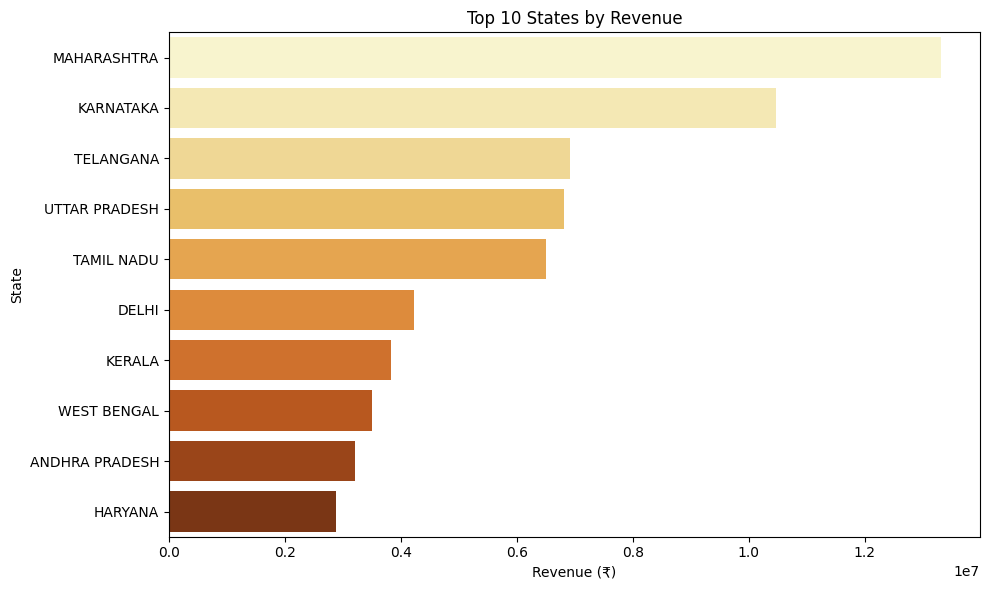

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_states.head(10), y='ship-state', x='amount', palette='YlOrBr')
plt.title("Top 10 States by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

/tmp/ipython-input-70-1611546044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities.head(10), y='ship-city', x='amount', palette='coolwarm')


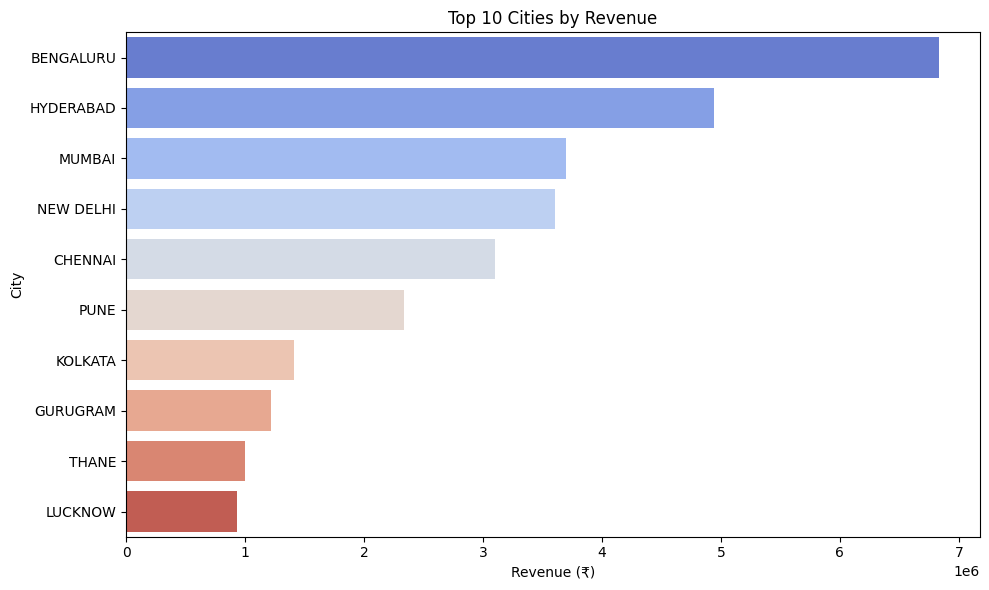

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cities.head(10), y='ship-city', x='amount', palette='coolwarm')
plt.title("Top 10 Cities by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [71]:
orders_by_state = df.groupby('ship-state')['order_id'].nunique().sort_values(ascending=False).reset_index()
orders_by_state.columns = ['State', 'Number of Orders']
orders_by_state.head()

,State,Number of Orders
0,MAHARASHTRA,19648
1,KARNATAKA,15274
2,TAMIL NADU,9883
3,TELANGANA,9748
4,UTTAR PRADESH,9390


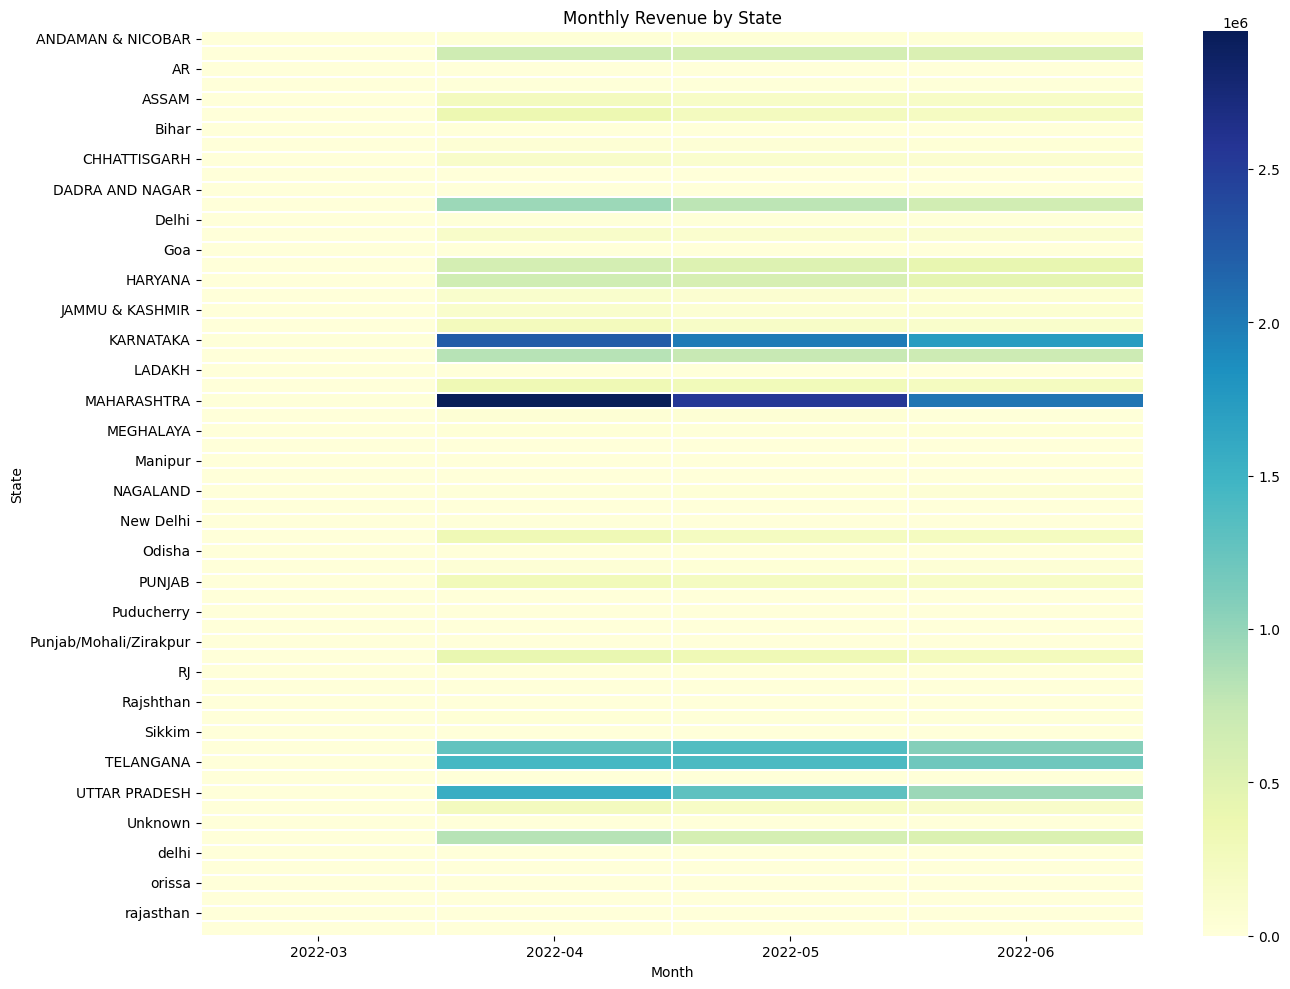

In [72]:
df['month'] = df['date'].dt.to_period('M')
heatmap_data = df.pivot_table(index='ship-state', columns='month', values='amount', aggfunc='sum').fillna(0)

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3)
plt.title("Monthly Revenue by State")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()

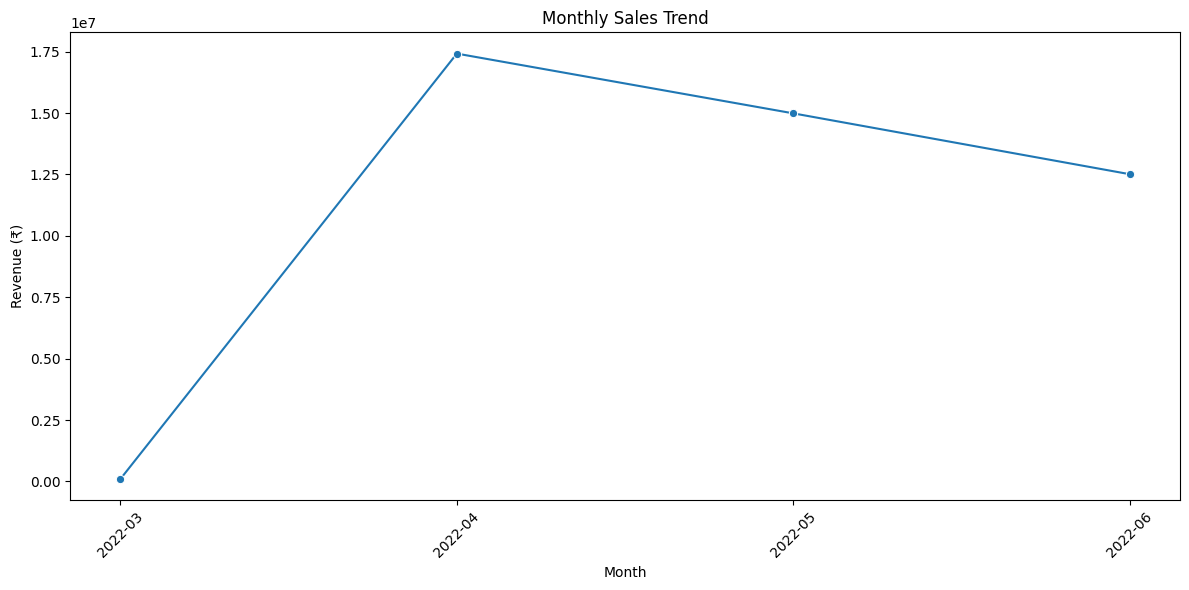

In [73]:
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['amount'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].astype(str)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='date', y='amount', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

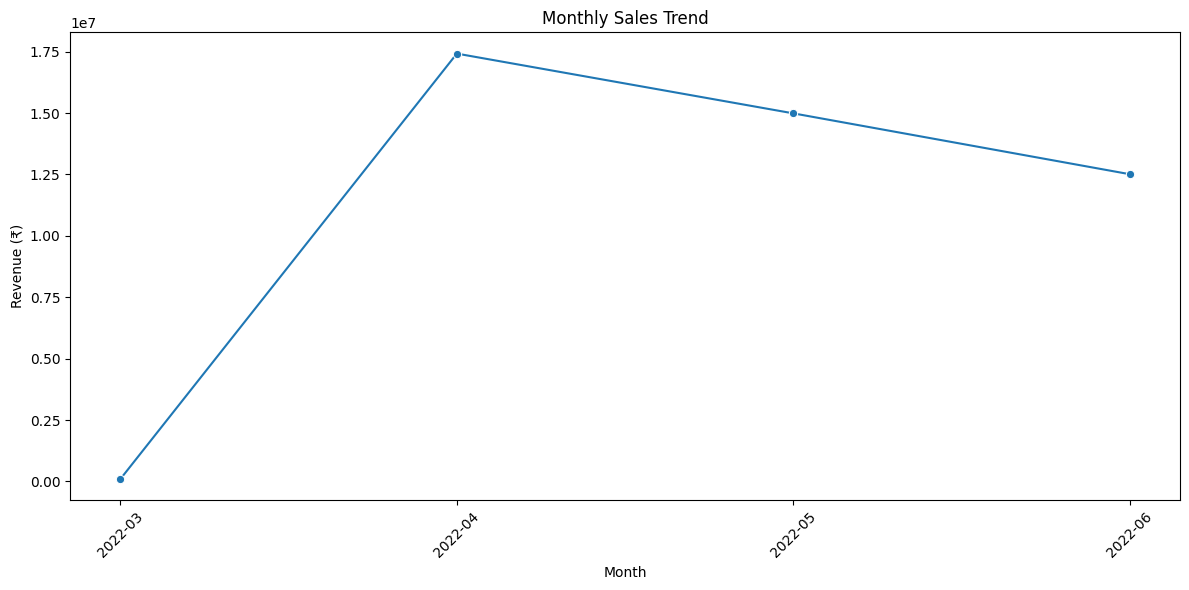

In [74]:
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['amount'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].astype(str)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='date', y='amount', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

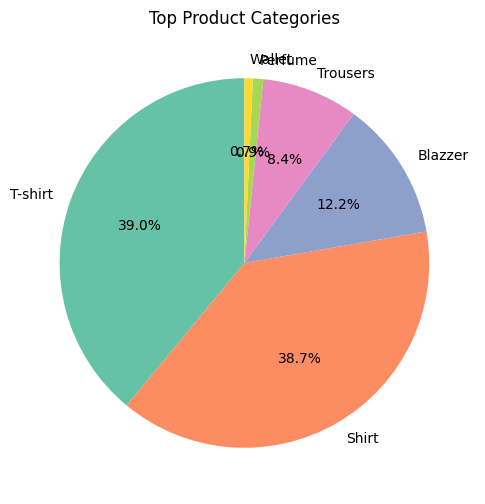

In [75]:
df['category'].value_counts().head(6).plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=sns.color_palette("Set2"))
plt.title("Top Product Categories")
plt.ylabel('')
plt.show()

/tmp/ipython-input-76-2838753723.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fulfilment', palette='pastel')


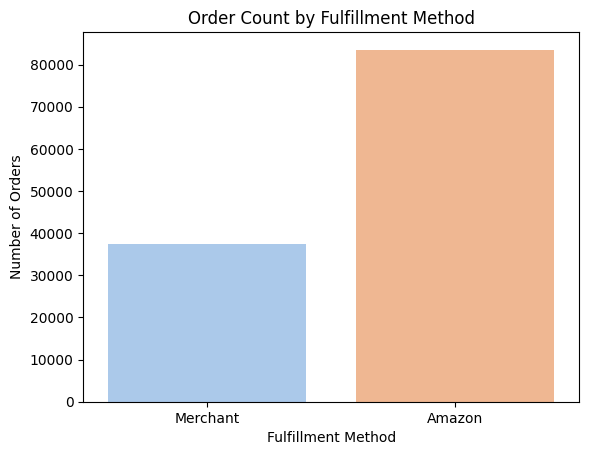

In [76]:
sns.countplot(data=df, x='fulfilment', palette='pastel')
plt.title("Order Count by Fulfillment Method")
plt.xlabel("Fulfillment Method")
plt.ylabel("Number of Orders")
plt.show()

/tmp/ipython-input-77-566483891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, y='ship-state', x='amount', palette='Blues_d')


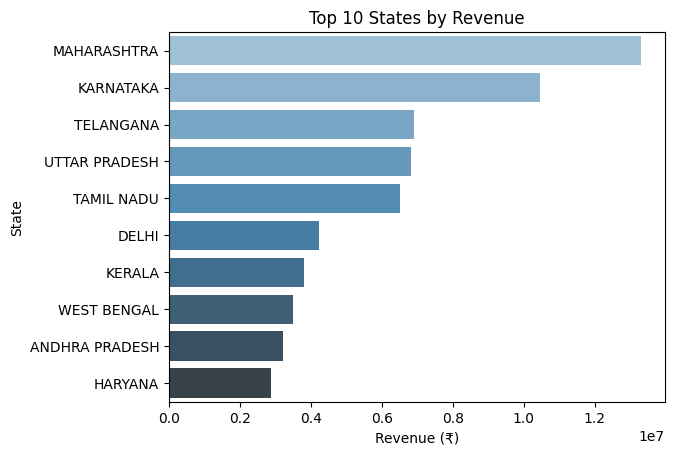

In [77]:
top_states = df.groupby('ship-state')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_states, y='ship-state', x='amount', palette='Blues_d')
plt.title("Top 10 States by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("State")
plt.show()